In [1]:
import uproot
import matplotlib.pyplot as plt
import numpy as np
import glob

# Find all root files in current directory
root_files = glob.glob("*.root")

# Branches to plot
branches = [
    "Missing_Pt", "Jets_InMa", "ecm125M","ecm125E","ecm125P","ecm125Pt",
]

# Pretty labels for branches (add/edit as needed)
branchLabels = {
    "Missing_Pt": r"$p_T^{\text{miss}}$ [GeV]",
    "Jets_InMa": r"Jet Invariant Mass [GeV]",
    "ecm125M": r"ecm125M [GeV]",
    "ecm125E": r"ecm125E [GeV]",
    "ecm125P": r"ecm125P [GeV]",
    "ecm125Pt": r"ecm125Pt [GeV]",
}





file_labels = {
    "wzp6_ee_Htautau_ecm125.root": r"$H \to \tau\tau$",
    "wzp6_ee_Hllnunu_ecm125.root": r"$H \to l l \nu\nu$",
    "wzp6_ee_eenunu_ecm125.root": r"$ee\nu\nu$",
    "wzp6_ee_mumununu_ecm125.root": r"$\mu \mu \nu \nu$",
    "wzp6_ee_tautaununu_ecm125.root": r"$\tau\tau\nu\nu$",
    "wzp6_ee_l1l2nunu_ecm125.root": r"$l_1 l_2 \nu\nu$",
    "wzp6_ee_tautau_ecm125.root": r"$\tau\tau$",

}
print(f"Found {len(root_files)} ROOT files:")
for f in root_files:
    print("  ", f)


Found 7 ROOT files:
   wzp6_ee_mumununu_ecm125.root
   wzp6_ee_tautaununu_ecm125.root
   wzp6_ee_Htautau_ecm125.root
   wzp6_ee_Hllnunu_ecm125.root
   wzp6_ee_eenunu_ecm125.root
   wzp6_ee_tautau_ecm125.root
   wzp6_ee_l1l2nunu_ecm125.root


In [2]:
import matplotlib as mpl

# Helvetica/Arial-like clean style
mpl.rcParams.update({
    "font.size": 14,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica", "Arial", "DejaVu Sans"],
    "mathtext.fontset": "stixsans",
    "axes.linewidth": 1.2,
    "axes.labelsize": 16,
    "xtick.direction": "in",
    "ytick.direction": "in",
    "xtick.top": True,
    "ytick.right": True,
    "xtick.labelsize": 14,
    "ytick.labelsize": 14,
    "legend.fontsize": 14,
    "legend.frameon": False,
    "figure.figsize": (7,7)
})

def add_fcc_tag_outside(fig, text="FCC-ee Delphes Simulation", ypos=1.02):
    """
    Places FCC tag above the axes (outside plot).
    ypos controls vertical offset relative to axes (default just above).
    """
    fig.text(
        0.1, ypos, text,
        fontsize=15, fontweight="bold",
        ha="left", va="bottom"
    )


In [3]:
import matplotlib as mpl

# Helvetica/Arial-like clean style
mpl.rcParams.update({
    "font.size": 14,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica", "Arial", "DejaVu Sans"],
    "mathtext.fontset": "stixsans",
    "axes.linewidth": 1.2,
    "axes.labelsize": 16,
    "xtick.direction": "in",
    "ytick.direction": "in",
    "xtick.top": True,
    "ytick.right": True,
    "xtick.labelsize": 14,
    "ytick.labelsize": 14,
    "legend.fontsize": 14,
    "legend.frameon": False,
    "figure.figsize": (12,12)
})

def add_fcc_tag_outside(fig, ypos=1.02):
    """
    Places FCC tag above the axes (outside plot).
    Makes 'FCC-ee' and 'Delphes Simulation' bold for emphasis.
    """
    # Using LaTeX formatting for bold
    text = r"$\bf{FCC\text{-}ee}$ $\bf{Delphes\ Simulation}$"
    
    fig.text(
        0.6, ypos, text,
        fontsize=16,  # slightly bigger to be obvious
        ha="left", va="bottom"
    )



In [4]:
def plot_branch(branch, bins=50, density=True, yscale=False):
    fig, ax = plt.subplots()
    
    for k, v in file_labels.items():
        with uproot.open(k) as file:
            tree = file["events"]
            arr = tree[branch].array(library="np")
    
        label = v  # already the value from the dictionary
        ax.hist(arr, bins=bins, histtype="step", label=label,
            linewidth=1.5, density=density)

    
    # Axis labels using branchLabels if available
    title = branchLabels.get(branch, branch)
    ax.set_title(title, fontsize=16, loc="right")
    ax.set_xlabel(title)
    ax.set_ylabel("Normalized counts" if density else "Counts")
    
    # Optional log y-axis
    if yscale:
        ax.set_yscale("log")
    
    ax.legend()
    
    # FCC-ee tag
    #add_fcc_tag_outside(fig)
    
    plt.tight_layout()
    plt.savefig(f"{branch}{yscale}.png")
    plt.show()


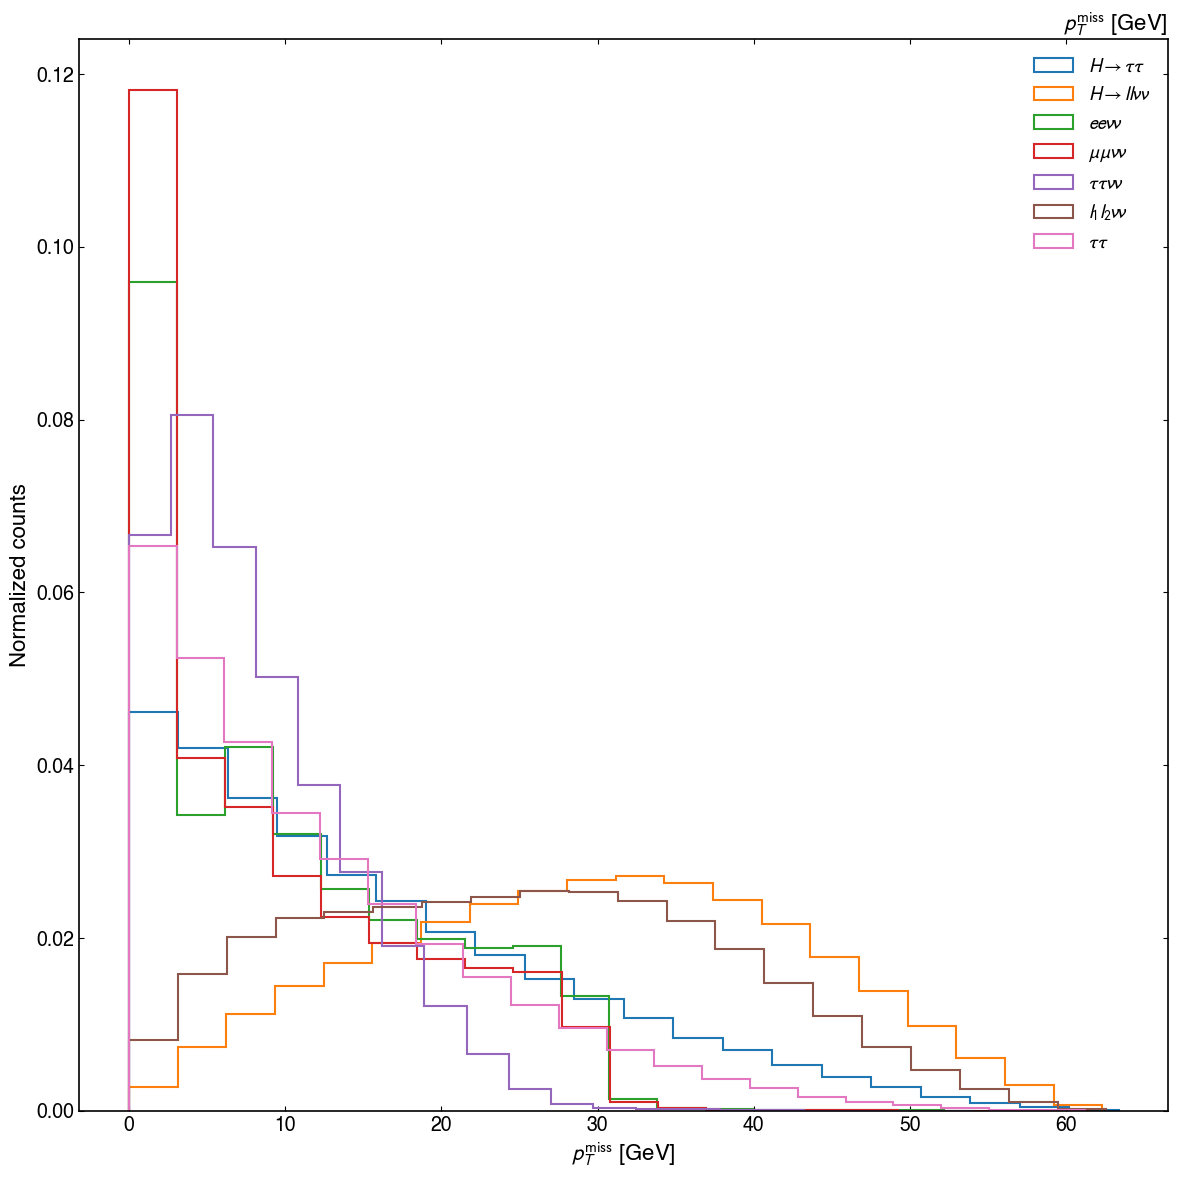

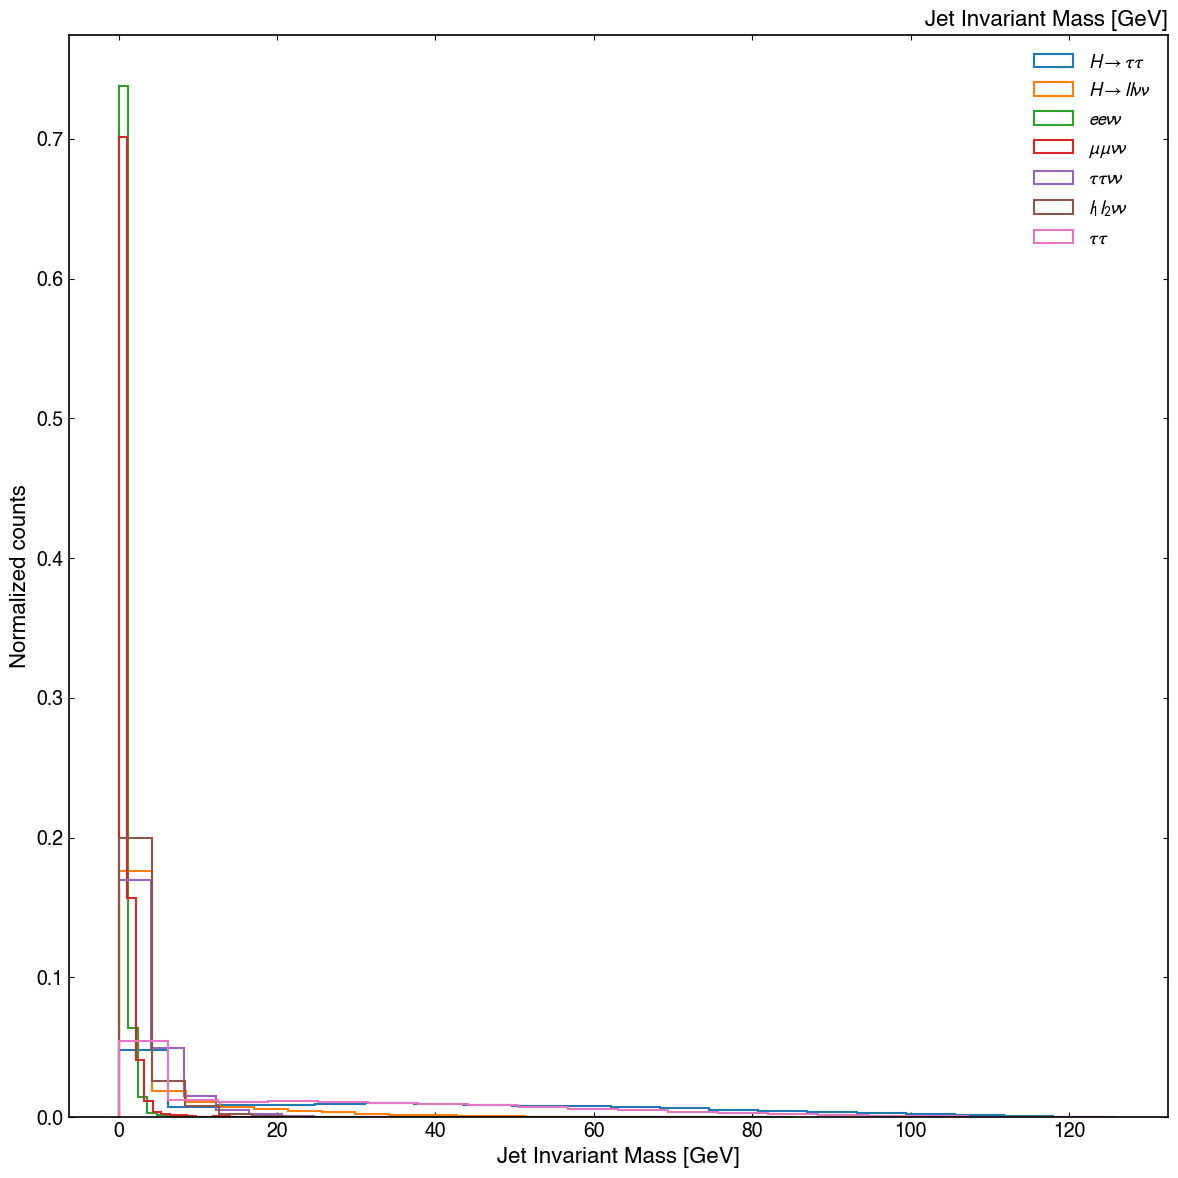

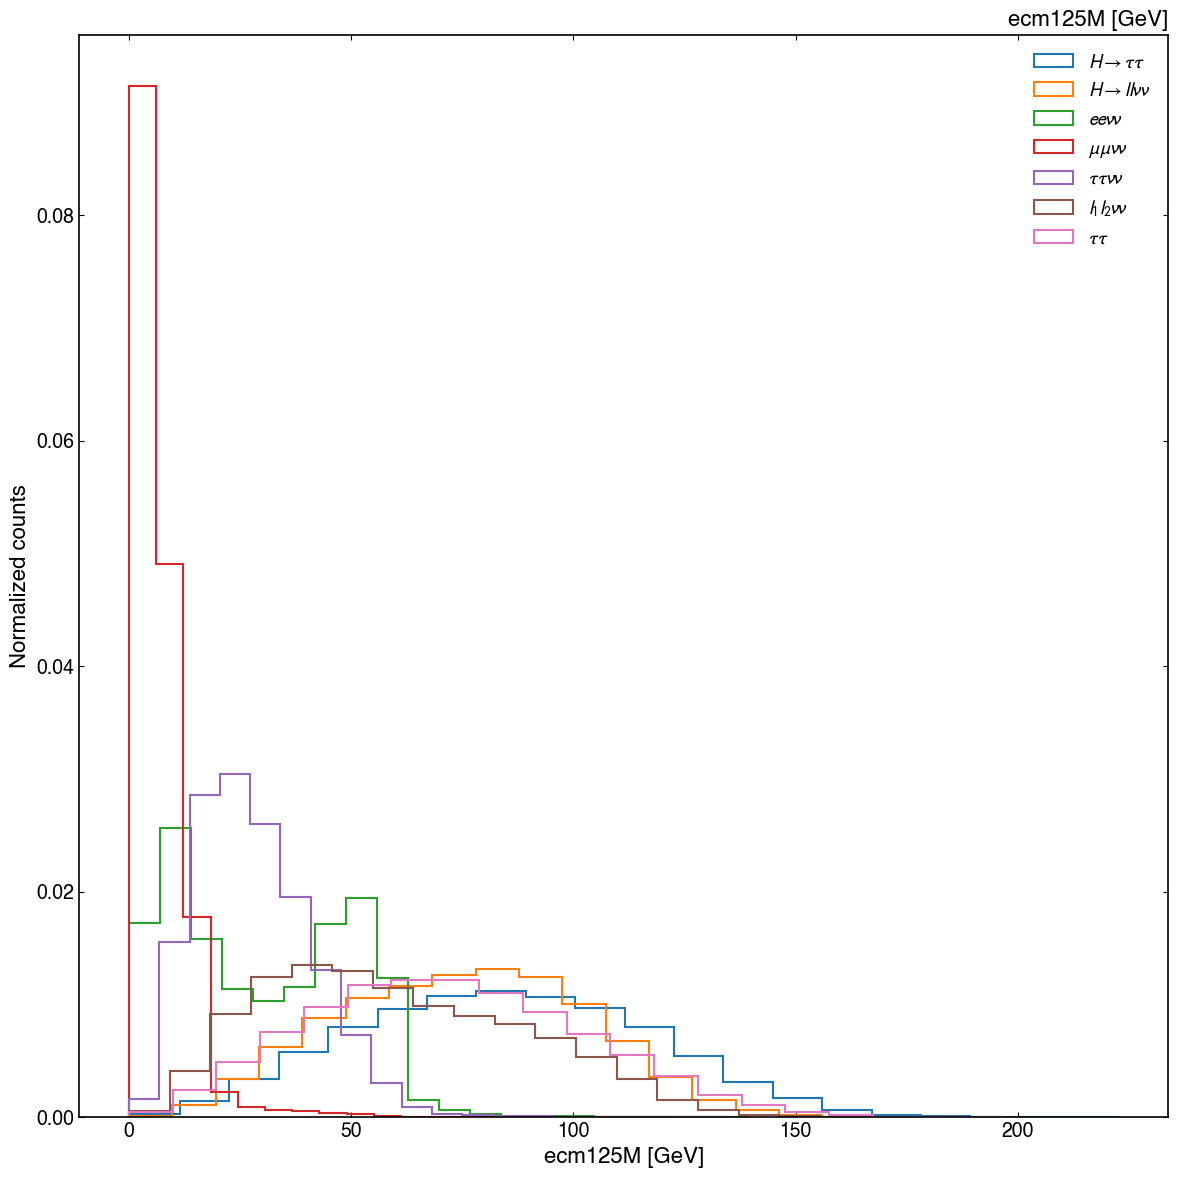

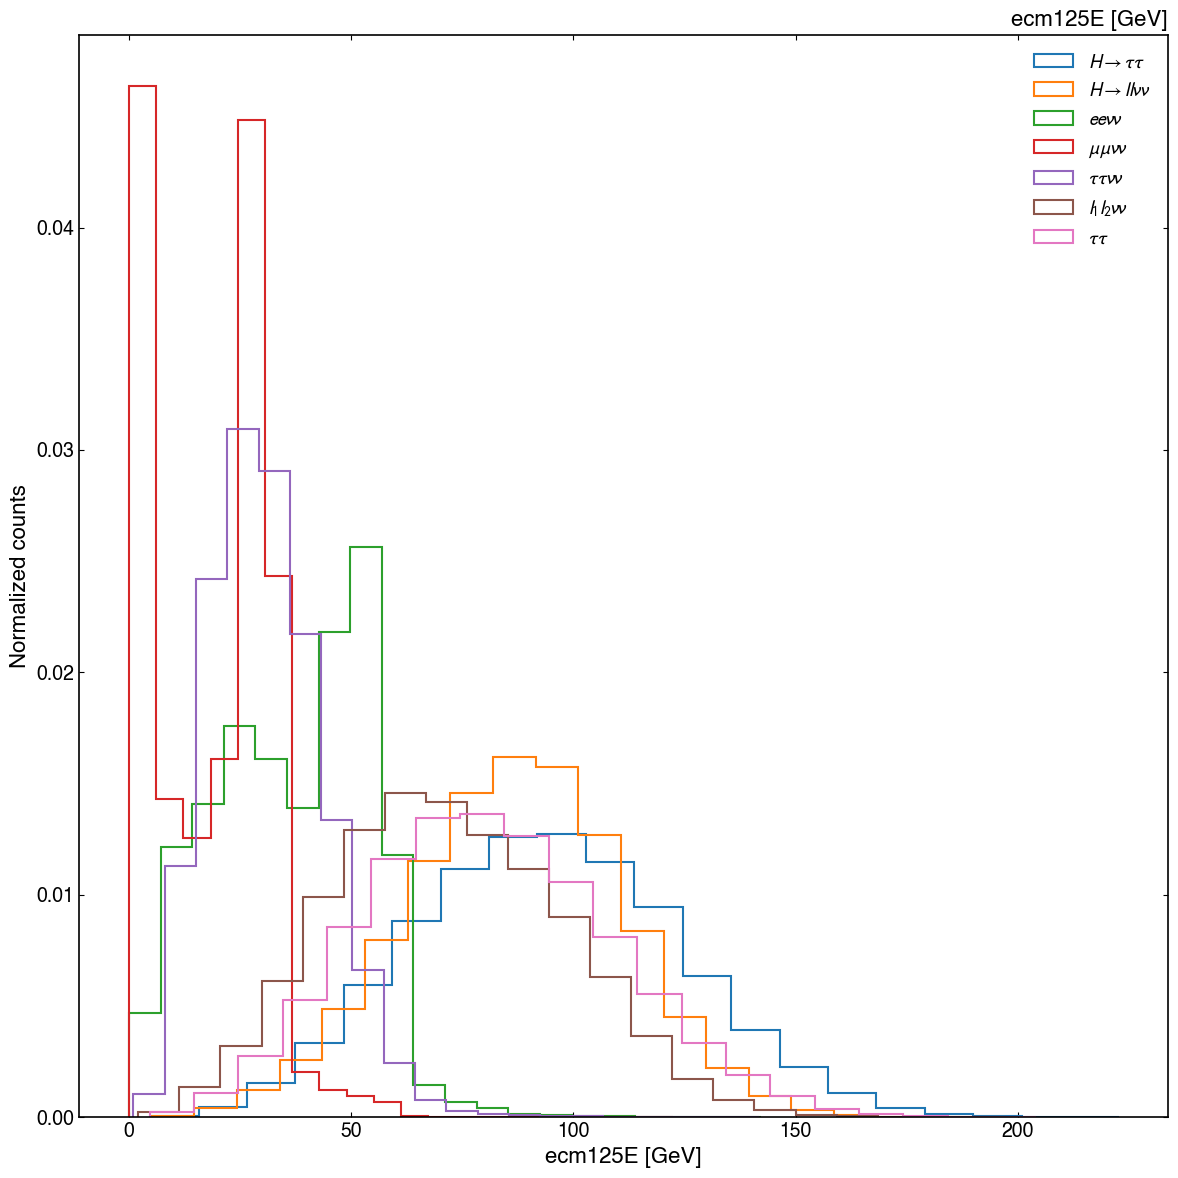

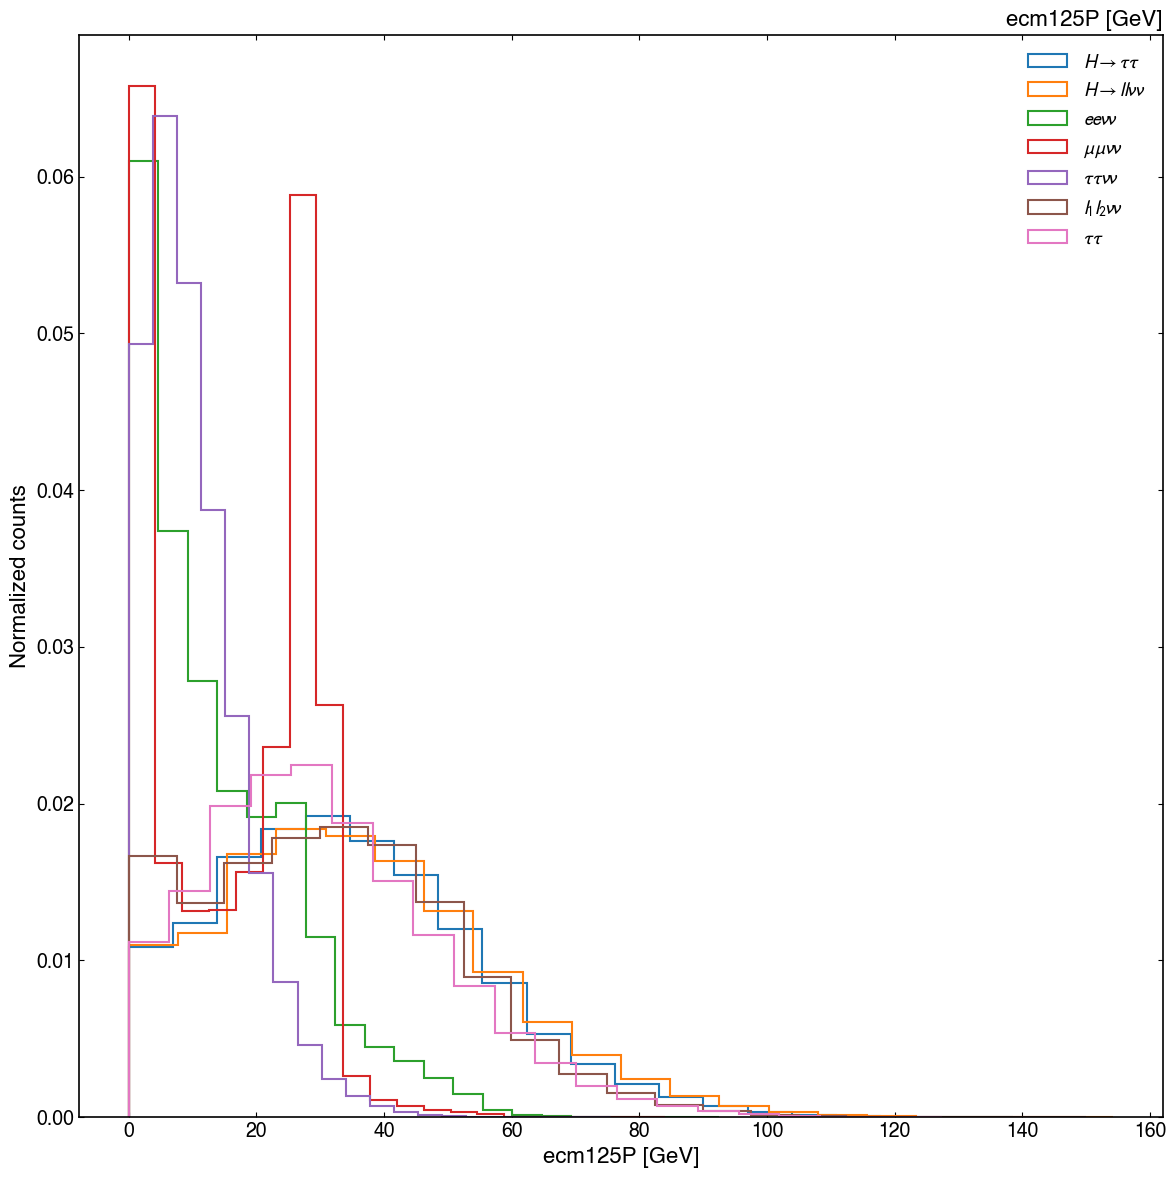

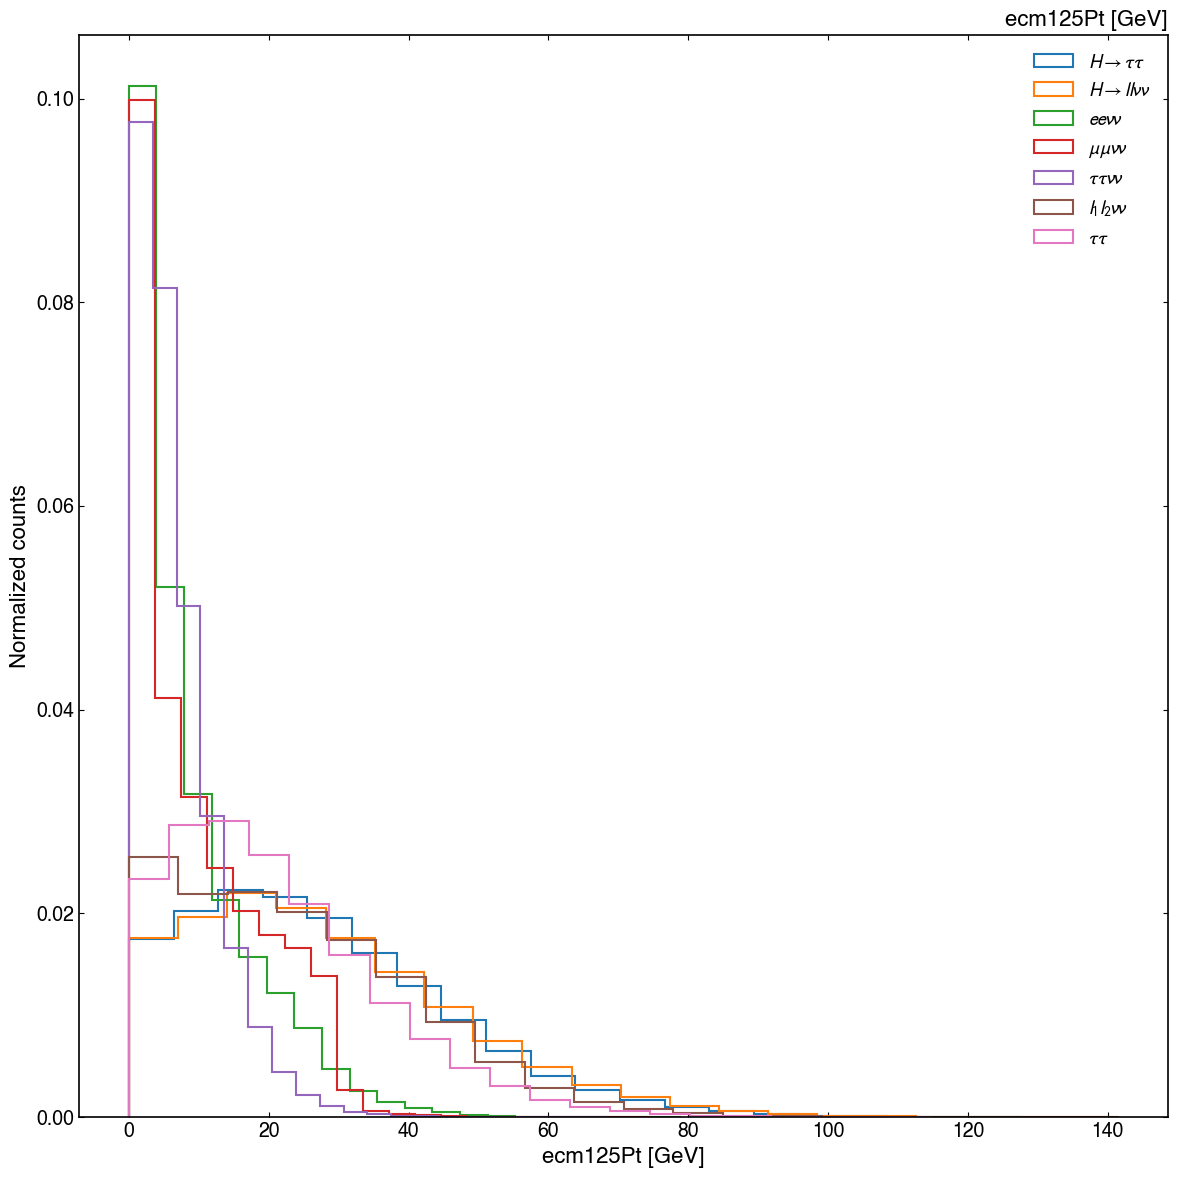

In [5]:
for branch in branchLabels:
    # You can toggle log scale if needed, e.g. yscale=True
    plot_branch(branch, bins=20, density=True, yscale=False)


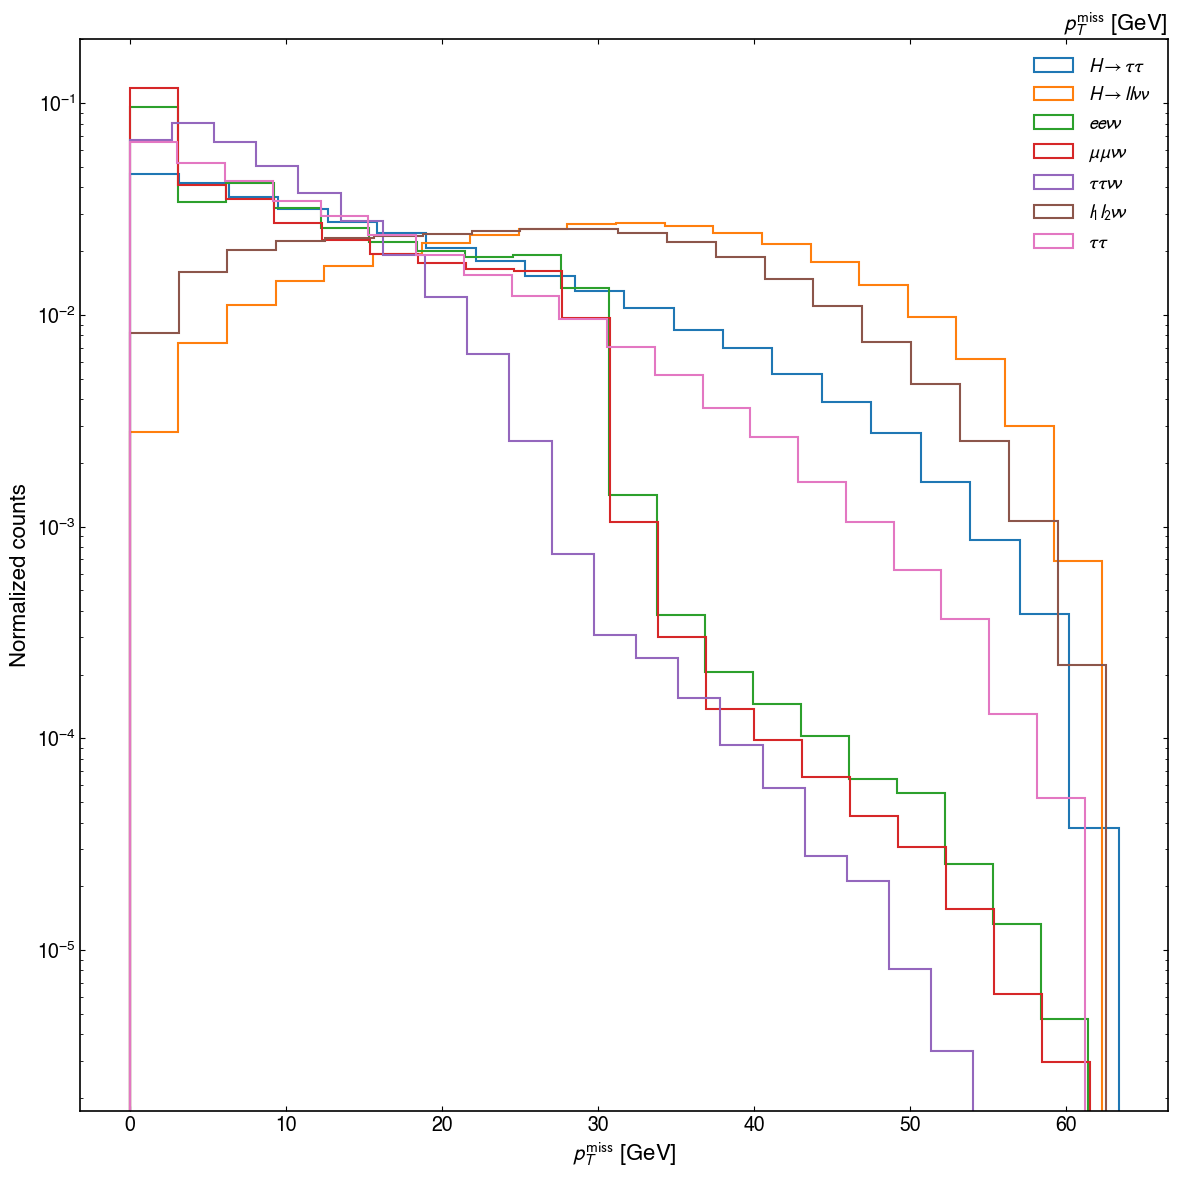

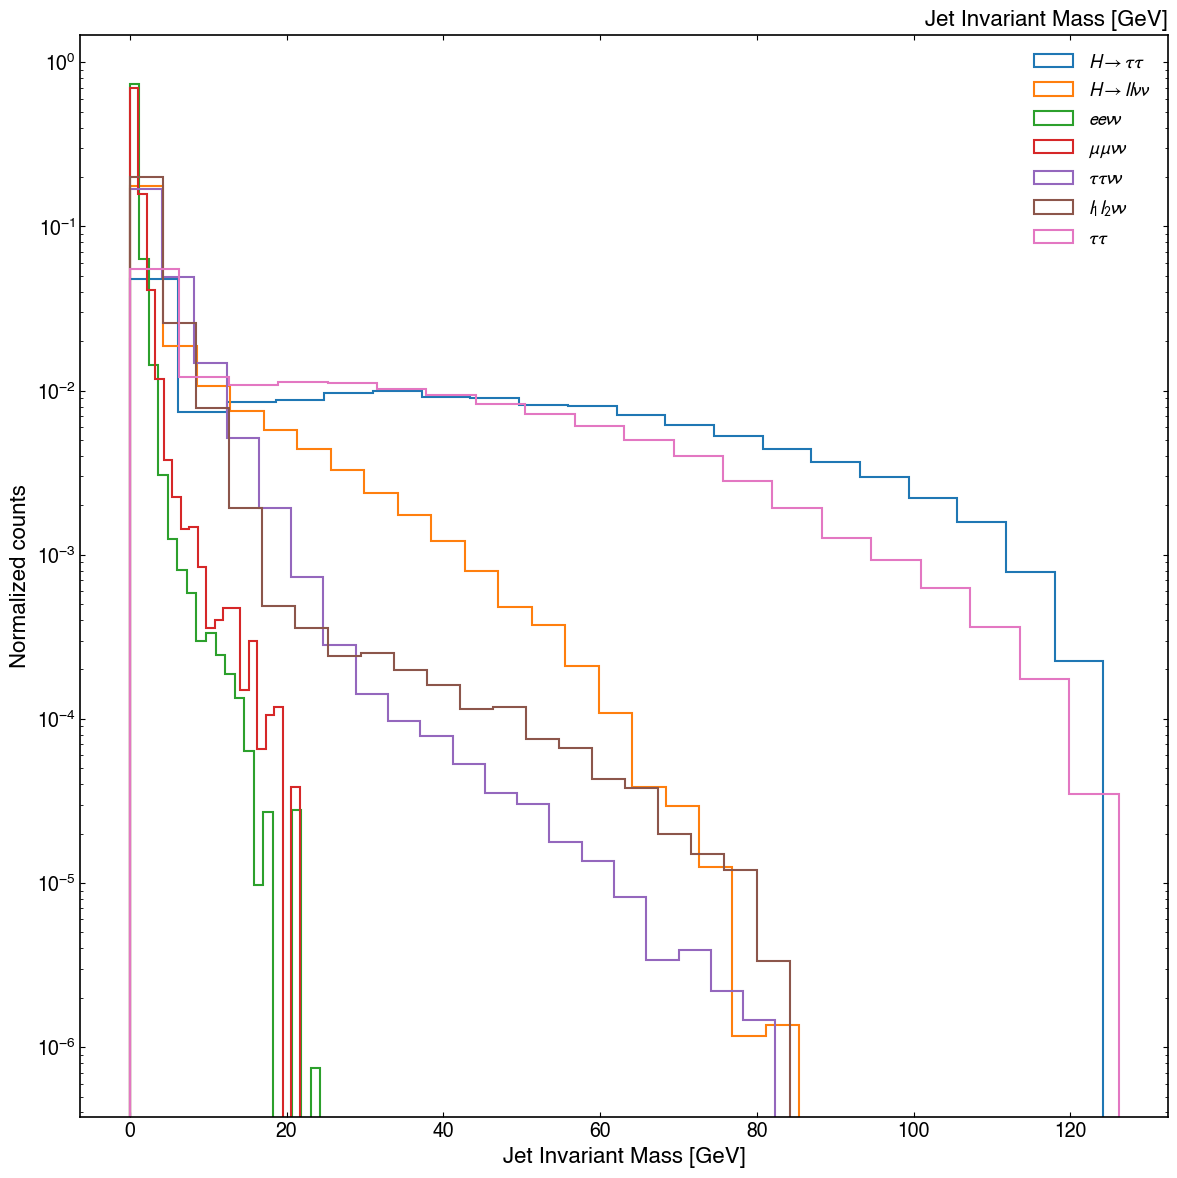

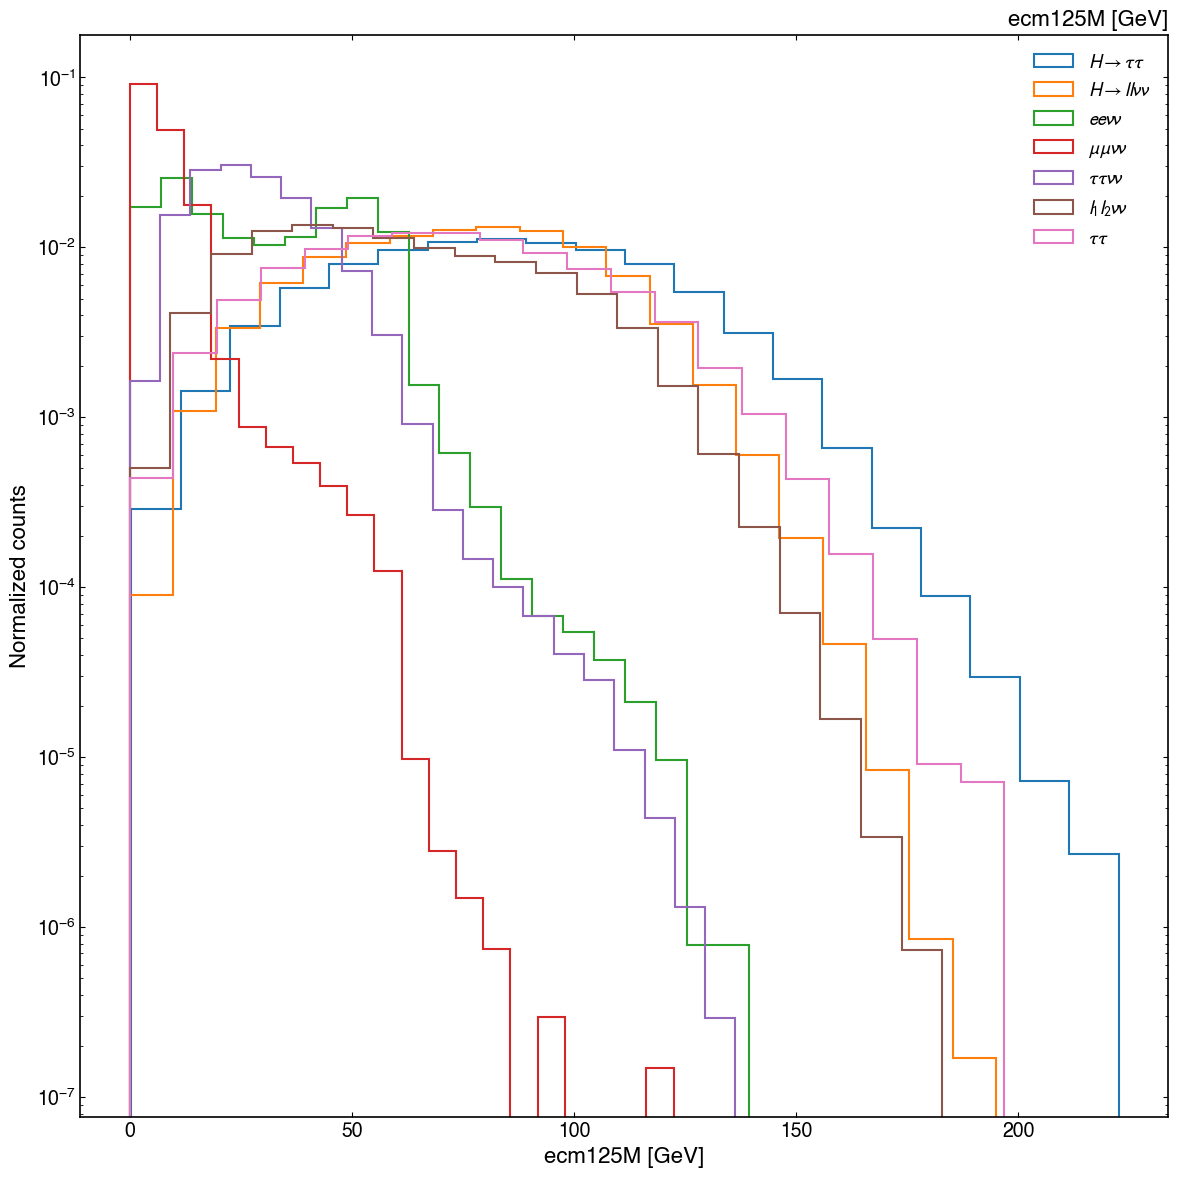

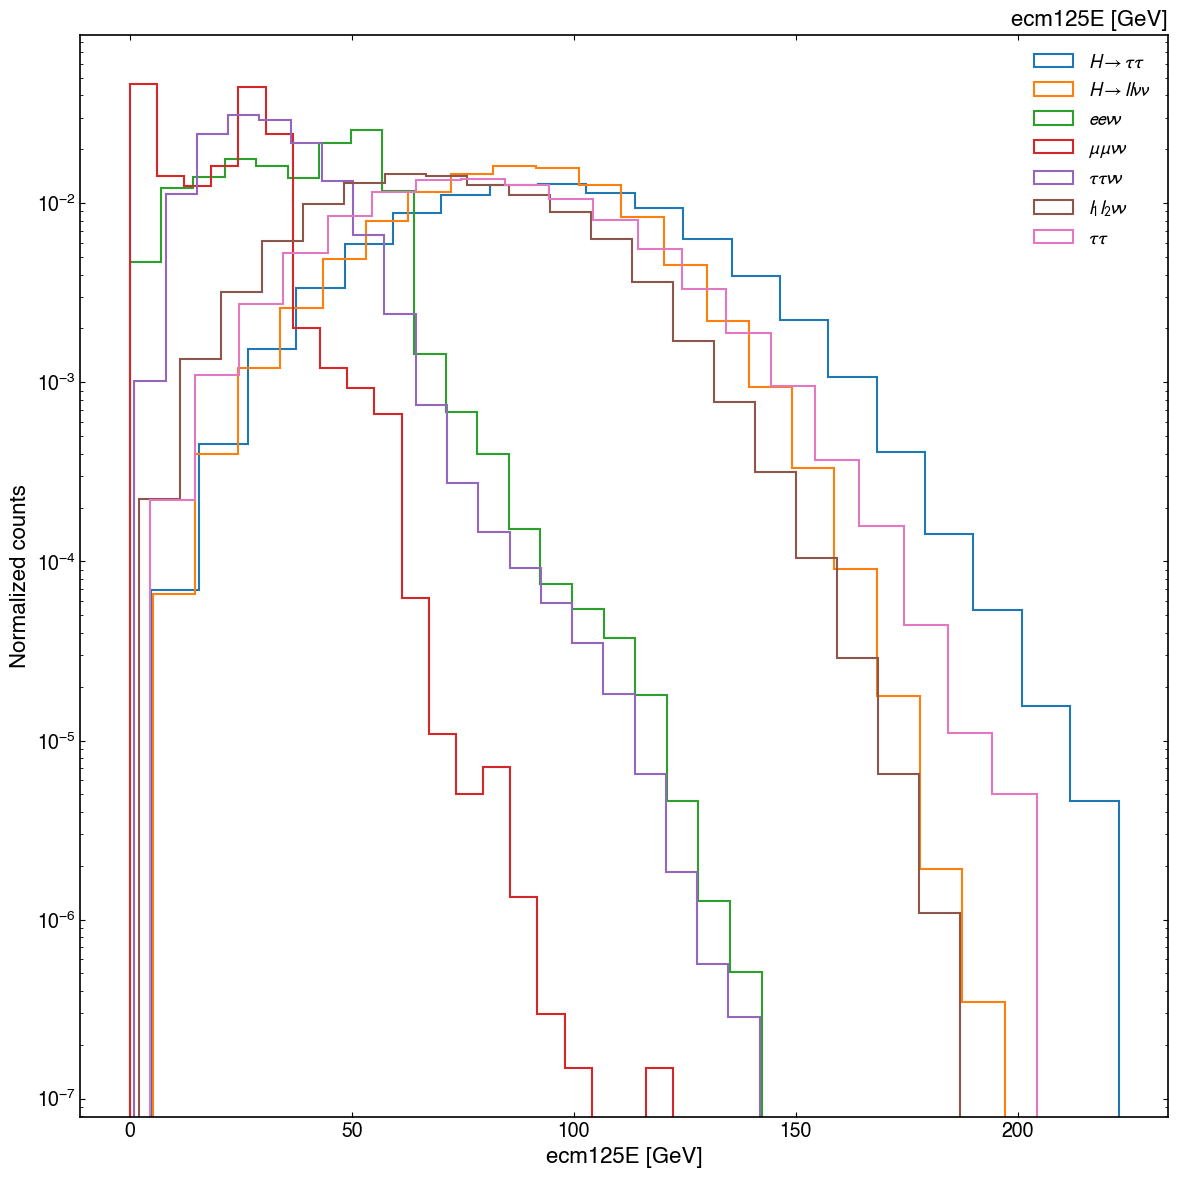

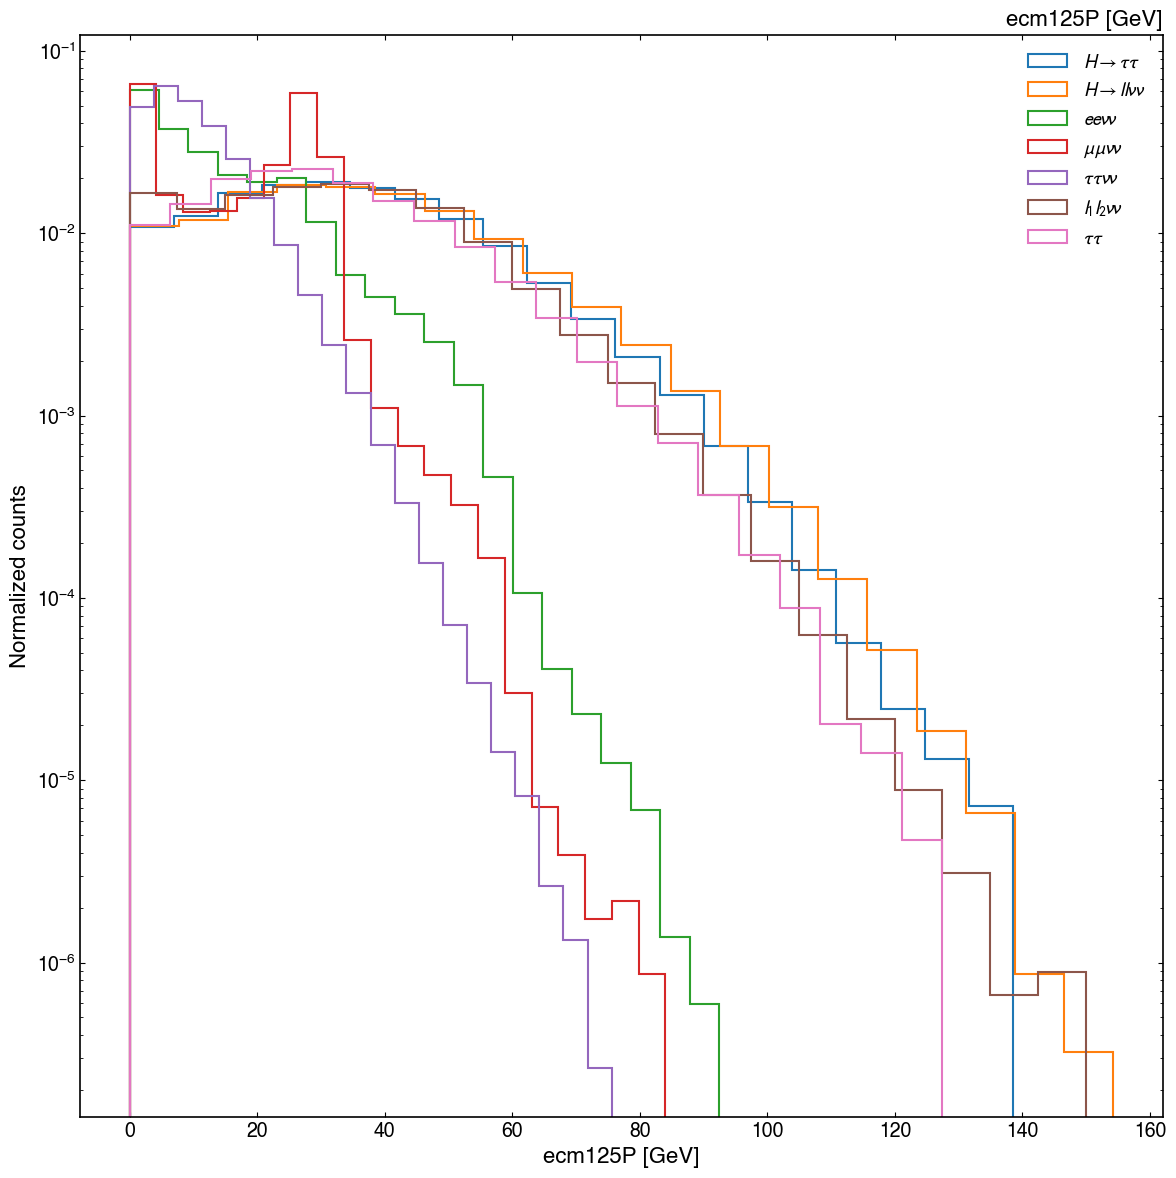

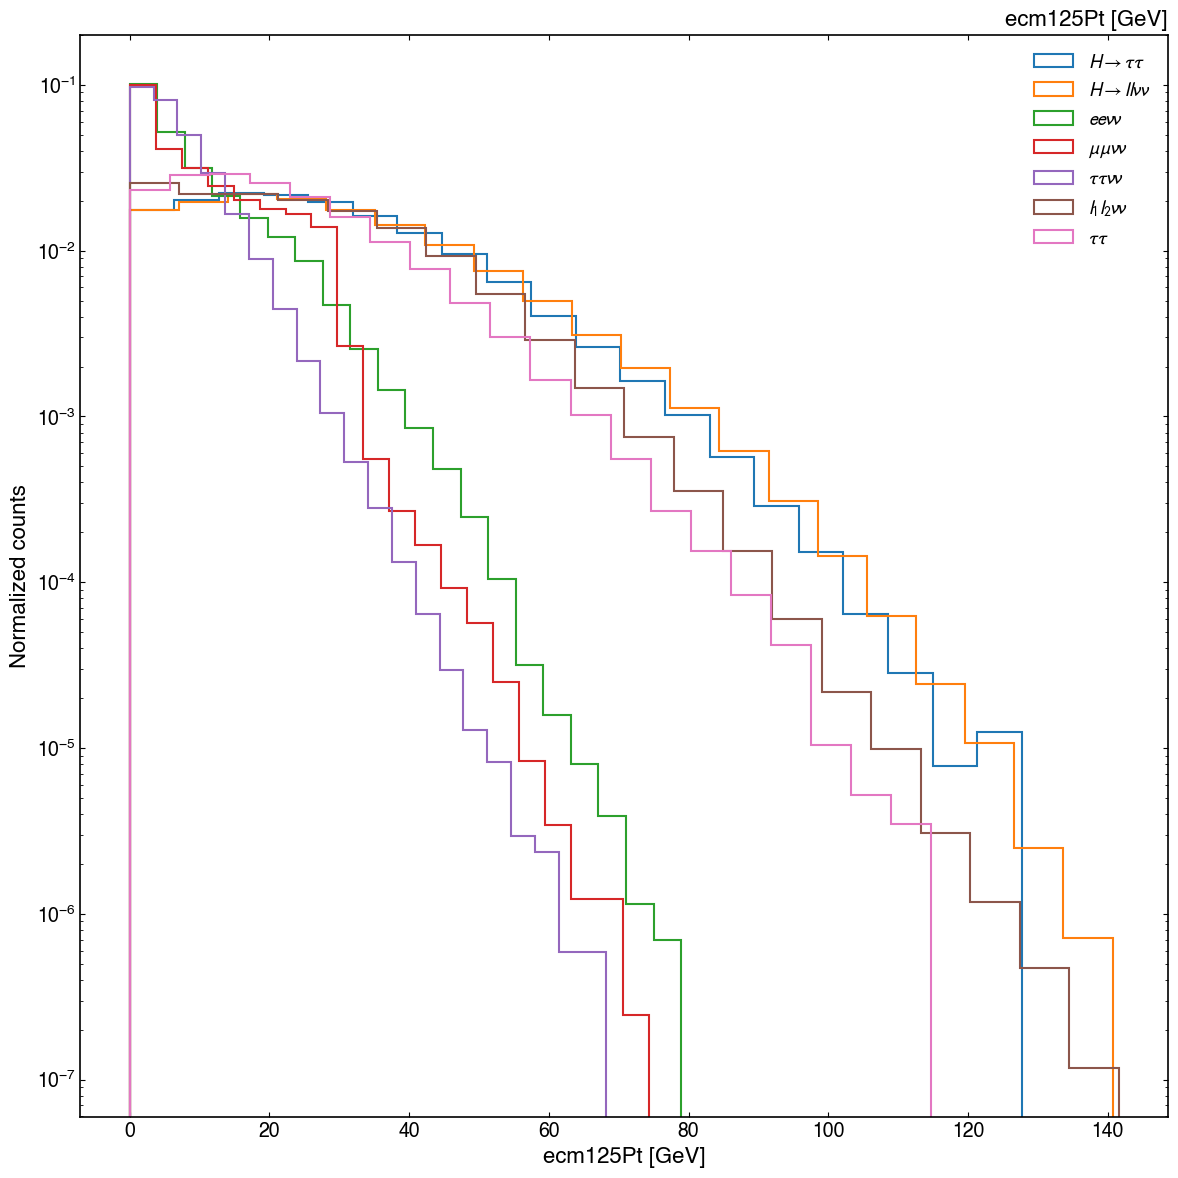

In [6]:
for branch in branchLabels:
    # You can toggle log scale if needed, e.g. yscale=True
    plot_branch(branch, bins=20, density=True, yscale=True)
